In [ ]:
#Extract the file and unzip
import tarfile

file_path = "GSE58135_RAW.tar"

with tarfile.open(file_path) as tar:
    tar.extractall(path="GSE58135_RAW_files")


/var/folders/h9/qgsr_yv10wl4r1rt1jy83pd00000gn/T/ipykernel_8422/695519814.py:6: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="GSE58135_RAW_files")  # extracts to this folder


In [17]:
import os

folder = "GSE58135_RAW_files"
print("Files extracted:", os.listdir(folder))


Files extracted: ['GSM1401788_SL12608_chimeras.bedpe.gz', 'GSM1401719_SL13095_chimeras.bedpe.gz', 'GSM1401711_SL10857_chimeras.bedpe.gz', 'GSM1401783_SL10812_chimeras.bedpe.gz', 'GSM1401807_SL8236_chimeras.bedpe.gz', 'GSM1401717_SL13098_gene.fpkm_tracking.gz', 'GSM1401761_SL10636_gene.fpkm_tracking.gz', 'GSM1401798_SL8217_chimeras.bedpe.gz', 'GSM1401755_SL8362_gene.fpkm_tracking.gz', 'GSM1401701_SL10806_chimeras.bedpe.gz', 'GSM1401761_SL10636_chimeras.bedpe.gz', 'GSM1401717_SL13098_chimeras.bedpe.gz', 'GSM1401731_SL7914_chimeras.bedpe.gz', 'GSM1401709_SL10854_chimeras.bedpe.gz', 'GSM1401780_SL10802_gene.fpkm_tracking.gz', 'GSM1401711_SL10857_gene.fpkm_tracking.gz', 'GSM1401734_SL7917_chimeras.bedpe.gz', 'GSM1401806_SL8235_chimeras.bedpe.gz', 'GSM1401800_SL8219_gene.fpkm_tracking.gz', 'GSM1401656_SL6570_gene.fpkm_tracking.gz', 'GSM1401789_SL13099_chimeras.bedpe.gz', 'GSM1401712_SL10858_gene.fpkm_tracking.gz', 'GSM1401690_SL10661_chimeras.bedpe.gz', 'GSM1401792_SL13091_chimeras.bedpe.gz'

In [ ]:
# Read the file as csv
import pandas as pd

df = pd.read_csv('GSM1401648_SL5421_chimeras.bedpe.gz', compression='gzip', sep='\t', header=None)
print(df.head())

         0          1          2        3          4          5   \
0  #chrom5p    start5p      end5p  chrom3p    start3p      end3p   
1      chr7  142575403  142583476     chr7  132719327  132720668   
2      chrM      12337      14644     chrM       8663       9989   
3     chr11   44958353   44972839     chr6   74225474   74228354   
4      chr1   28369081   28415130     chr1   16973692   16974586   

                   6      7         8         9   ...           13  \
0  chimera_cluster_id  score  strand5p  strand3p  ...      genes3p   
1          CLUSTER307     56         -         -  ...        EEF1G   
2          CLUSTER193     30         +         +  ...  OK/SW-cl.16   
3          CLUSTER281     31         -         -  ...       EEF1A1   
4           CLUSTER27     20         -         +  ...         MST1   

                            14         15           16              17  \
0                         type   distance  total_frags  spanning_frags   
1             Intrachr

In [ ]:
print(df.head())
print(df.info())


         0          1          2        3          4          5   \
0  #chrom5p    start5p      end5p  chrom3p    start3p      end3p   
1      chr7  142575403  142583476     chr7  132719327  132720668   
2      chrM      12337      14644     chrM       8663       9989   
3     chr11   44958353   44972839     chr6   74225474   74228354   
4      chr1   28369081   28415130     chr1   16973692   16974586   

                   6      7         8         9   ...           13  \
0  chimera_cluster_id  score  strand5p  strand3p  ...      genes3p   
1          CLUSTER307     56         -         -  ...        EEF1G   
2          CLUSTER193     30         +         +  ...  OK/SW-cl.16   
3          CLUSTER281     31         -         -  ...       EEF1A1   
4           CLUSTER27     20         -         +  ...         MST1   

                            14         15           16              17  \
0                         type   distance  total_frags  spanning_frags   
1             Intrachr

In [29]:
df.columns = df.iloc[0]    # assign first row as header
df = df[1:]               # remove the first row from data
df = df.reset_index(drop=True)  # reset index
print(df.columns.tolist())  # now columns should show correct names

['#chrom5p', 'start5p', 'end5p', 'chrom3p', 'start3p', 'end3p', 'chimera_cluster_id', 'score', 'strand5p', 'strand3p', 'transcript_ids_5p', 'transcript_ids_3p', 'genes5p', 'genes3p', 'type', 'distance', 'total_frags', 'spanning_frags', 'unique_alignment_positions', 'isoform_fraction_5p', 'isoform_fraction_3p', 'breakpoint_spanning_reads', 'chimera_ids']


Dataset shape: (318, 27)

0           score      distance  isoform_fraction_5p  isoform_fraction_3p  \
count  318.000000  1.530000e+02           318.000000           318.000000   
mean     3.852201  2.810568e+05             0.557570             0.565994   
std      4.765827  2.474205e+07             0.446656             0.450835   
min      2.000000 -1.258990e+08             0.010363             0.010101   
25%      2.000000 -3.502300e+04             0.054429             0.038776   
50%      2.000000  0.000000e+00             0.666667             0.750000   
75%      4.000000  1.456000e+04             1.000000             1.000000   
max     56.000000  2.252042e+08             1.000000             1.000000   

0       num_reads  avg_read_length  read_count  
count  318.000000       318.000000  318.000000  
mean     0.138365         1.121069    0.138365  
std      0.813746         5.443273    0.813746  
min      0.000000         0.000000    0.000000  
25%      0.000000         0.000000 

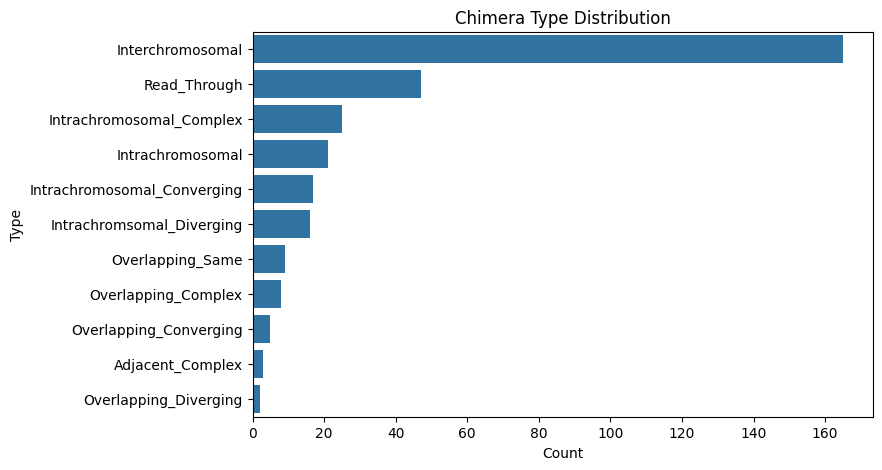

Top 10 genes involved in chimeras:
 NPIPL3         12
NPIPL2         12
BC018860        9
LOC23117        9
TVAS5           9
NAIP            8
SMA3            8
SMA4            8
OK/SW-cl.16     7
LOC440295       6
Name: count, dtype: int64


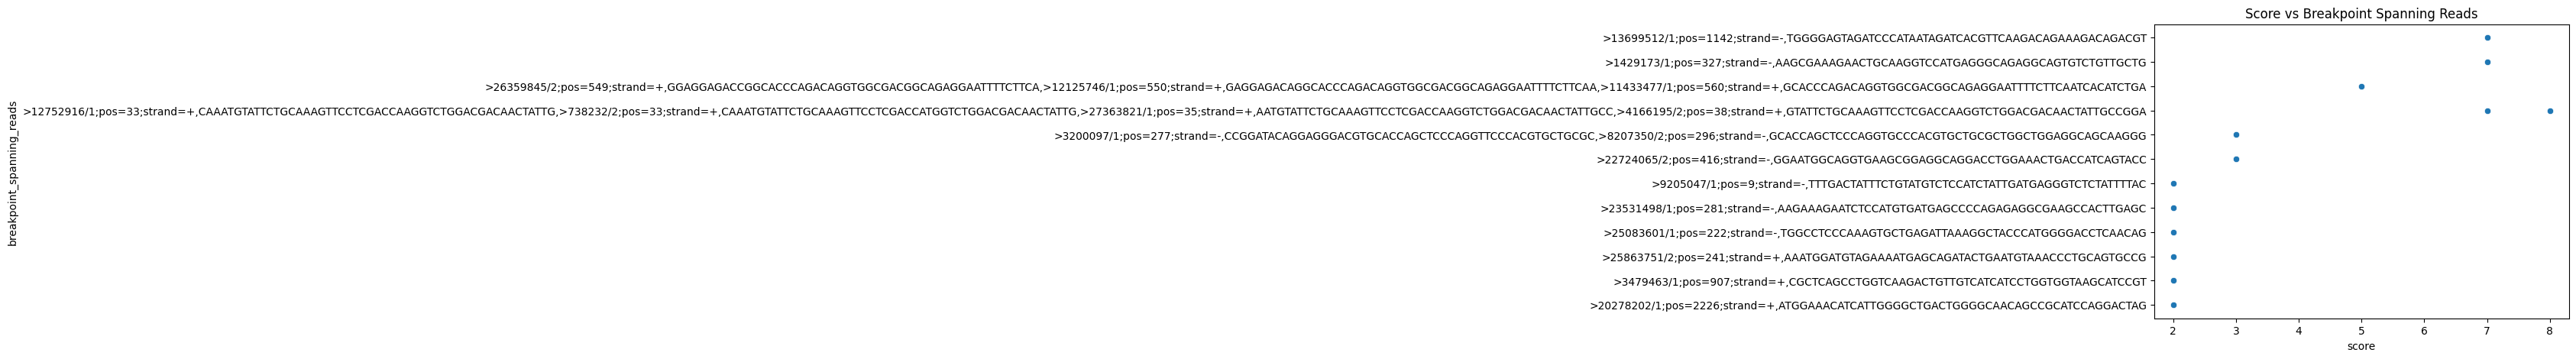

0      total_frags spanning_frags unique_alignment_positions
count          318            318                        318
unique          20              5                         17
top              2              0                          2
freq           185            305                        189


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(f"Dataset shape: {df.shape}\n")
print(df.describe())

# Number of unique chimeras and genes
num_chimeras = df['chimera_cluster_id'].nunique()
unique_genes_5p = pd.Series(','.join(df['genes5p'].dropna()).split(',')).nunique()
unique_genes_3p = pd.Series(','.join(df['genes3p'].dropna()).split(',')).nunique()
print(f"Unique chimera clusters: {num_chimeras}")
print(f"Unique 5' genes: {unique_genes_5p}")
print(f"Unique 3' genes: {unique_genes_3p}")

# Chimera type distribution
plt.figure(figsize=(8,5))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index)
plt.title('Chimera Type Distribution')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

# Top 10 genes involved (combine 5p and 3p genes)
genes_5p = pd.Series(','.join(df['genes5p'].dropna()).split(','))
genes_3p = pd.Series(','.join(df['genes3p'].dropna()).split(','))
all_genes = pd.concat([genes_5p, genes_3p])
top_genes = all_genes.value_counts().head(10)
print("Top 10 genes involved in chimeras:\n", top_genes)

# Correlation between score and breakpoint spanning reads
plt.figure(figsize=(7,5))
sns.scatterplot(x='score', y='breakpoint_spanning_reads', data=df)
plt.title('Score vs Breakpoint Spanning Reads')
plt.show()

# Fragment statistics summary
print(df[['total_frags', 'spanning_frags', 'unique_alignment_positions']].describe())


In [38]:

# Convert 'score' to numeric in case it's not already
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Count the number of reads in 'breakpoint_spanning_reads'
df['num_reads'] = df['breakpoint_spanning_reads'].apply(
    lambda x: len(str(x).split(',')) if pd.notnull(x) and str(x).strip() != '' else 0
)

# Show a few example rows
print(df[['score', 'breakpoint_spanning_reads', 'num_reads']].head())

# Compute correlation
correlation = df['score'].corr(df['num_reads'])
print(f"\n📊 Correlation between score and number of reads: {correlation:.2f}")


0  score breakpoint_spanning_reads  num_reads
0     56                       NaN          0
1     30                       NaN          0
2     31                       NaN          0
3     20                       NaN          0
4     19                       NaN          0

📊 Correlation between score and number of reads: 0.04


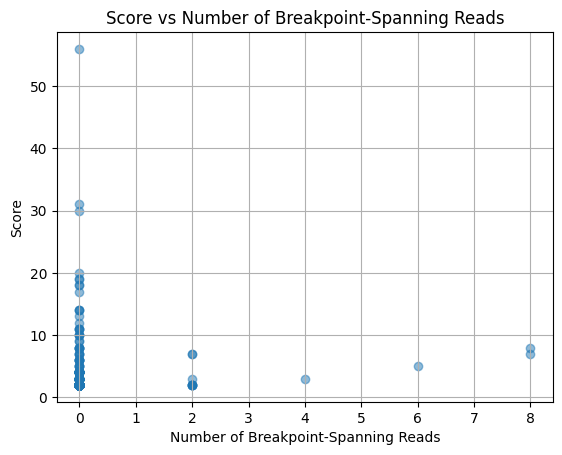

In [40]:
plt.scatter(df['num_reads'], df['score'], alpha=0.5)
plt.xlabel('Number of Breakpoint-Spanning Reads')
plt.ylabel('Score')
plt.title('Score vs Number of Breakpoint-Spanning Reads')
plt.grid(True)
plt.show()


In [39]:

# Ensure 'score' is numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Function to extract average read length from read strings
def average_read_length(entry):
    if pd.isnull(entry) or str(entry).strip() == '':
        return 0
    reads = str(entry).split(',')
    lengths = []
    for read in reads:
        parts = read.split(',')
        for p in parts:
            if '>' in p and ',' in entry:
                # sequence is the part after the last comma
                seq = p.split(',')[-1]
            elif ';strand=' in p:
                seq = p.split(';strand=')[-1].split(',')[-1]
            elif ',' in p:
                seq = p.split(',')[-1]
            else:
                continue
            lengths.append(len(seq.strip()))
    return sum(lengths) / len(lengths) if lengths else 0

# Apply the function
df['avg_read_length'] = df['breakpoint_spanning_reads'].apply(average_read_length)

# Show a few rows
print(df[['score', 'avg_read_length']].head())

# Calculate correlation
correlation = df['score'].corr(df['avg_read_length'])
print(f"\n📊 Correlation between score and average read length: {correlation:.2f}")


0  score  avg_read_length
0     56              0.0
1     30              0.0
2     31              0.0
3     20              0.0
4     19              0.0

📊 Correlation between score and average read length: 0.01


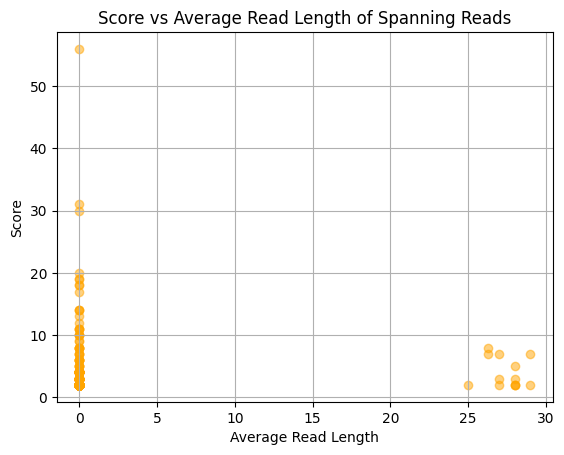

In [41]:
plt.scatter(df['avg_read_length'], df['score'], alpha=0.5, color='orange')
plt.xlabel('Average Read Length')
plt.ylabel('Score')
plt.title('Score vs Average Read Length of Spanning Reads')
plt.grid(True)
plt.show()

In [37]:
print(df['breakpoint_spanning_reads'].unique())
print(df['score'].unique())



[nan
 '>13699512/1;pos=1142;strand=-,TGGGGAGTAGATCCCATAATAGATCACGTTCAAGACAGAAAGACAGACGT'
 '>1429173/1;pos=327;strand=-,AAGCGAAAGAACTGCAAGGTCCATGAGGGCAGAGGCAGTGTCTGTTGCTG'
 '>26359845/2;pos=549;strand=+,GGAGGAGACCGGCACCCAGACAGGTGGCGACGGCAGAGGAATTTTCTTCA,>12125746/1;pos=550;strand=+,GAGGAGACAGGCACCCAGACAGGTGGCGACGGCAGAGGAATTTTCTTCAA,>11433477/1;pos=560;strand=+,GCACCCAGACAGGTGGCGACGGCAGAGGAATTTTCTTCAATCACATCTGA'
 '>12752916/1;pos=33;strand=+,CAAATGTATTCTGCAAAGTTCCTCGACCAAGGTCTGGACGACAACTATTG,>738232/2;pos=33;strand=+,CAAATGTATTCTGCAAAGTTCCTCGACCATGGTCTGGACGACAACTATTG,>27363821/1;pos=35;strand=+,AATGTATTCTGCAAAGTTCCTCGACCAAGGTCTGGACGACAACTATTGCC,>4166195/2;pos=38;strand=+,GTATTCTGCAAAGTTCCTCGACCAAGGTCTGGACGACAACTATTGCCGGA'
 '>3200097/1;pos=277;strand=-,CCGGATACAGGAGGGACGTGCACCAGCTCCCAGGTTCCCACGTGCTGCGC,>8207350/2;pos=296;strand=-,GCACCAGCTCCCAGGTGCCCACGTGCTGCGCTGGCTGGAGGCAGCAAGGG'
 '>22724065/2;pos=416;strand=-,GGAATGGCAGGTGAAGCGGAGGCAGGACCTGGAAACTGACCATCAGTACC'
 '>9205047/1;pos=9;strand=

In [42]:
# Ensure 'score' is numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Function to count number of reads in each cell
def count_reads(entry):
    if pd.isnull(entry) or entry.strip() == '':
        return 0
    return len(entry.split(','))

# Apply function to get read count per row
df['read_count'] = df['breakpoint_spanning_reads'].apply(count_reads)

# Show a few rows
print(df[['score', 'read_count']].head())

# Correlation between read count and score
correlation = df['score'].corr(df['read_count'])
print(f"\n📊 Correlation between score and number of spanning reads: {correlation:.2f}")

0  score  read_count
0     56           0
1     30           0
2     31           0
3     20           0
4     19           0

📊 Correlation between score and number of spanning reads: 0.04


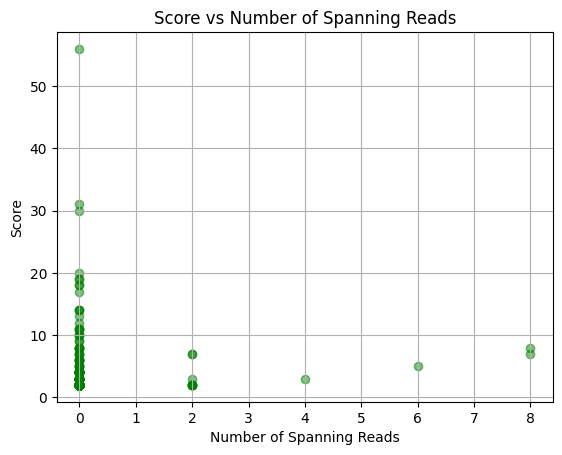

In [43]:
plt.scatter(df['read_count'], df['score'], alpha=0.5, color='green')
plt.xlabel('Number of Spanning Reads')
plt.ylabel('Score')
plt.title('Score vs Number of Spanning Reads')
plt.grid(True)
plt.show()

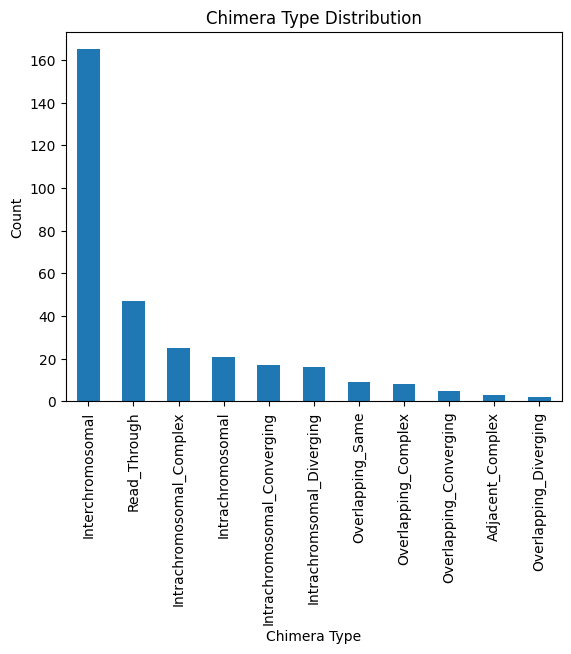

In [44]:
chimera_counts = df['type'].value_counts()
chimera_counts.plot(kind='bar', title='Chimera Type Distribution')
plt.xlabel('Chimera Type')
plt.ylabel('Count')
plt.show()

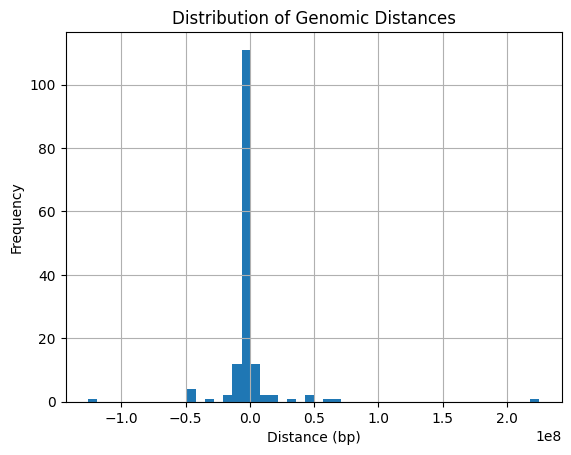

In [45]:
df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
df['distance'].hist(bins=50)
plt.title('Distribution of Genomic Distances')
plt.xlabel('Distance (bp)')
plt.ylabel('Frequency')
plt.show()

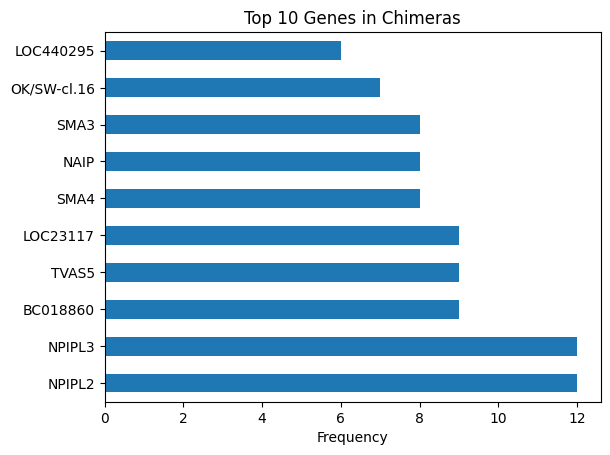

In [46]:
from collections import Counter

genes = df['genes5p'].dropna().tolist() + df['genes3p'].dropna().tolist()
gene_counts = Counter(g for line in genes for g in line.split(','))
top_genes = pd.Series(gene_counts).nlargest(10)
top_genes.plot(kind='barh', title='Top 10 Genes in Chimeras')
plt.xlabel('Frequency')
plt.show()

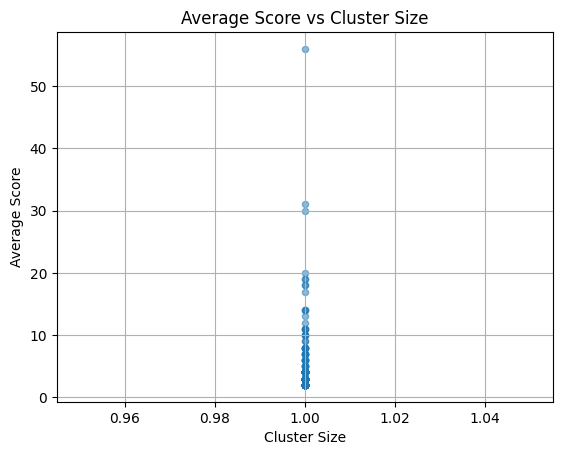

In [47]:
cluster_scores = df.groupby('chimera_cluster_id')['score'].mean()
cluster_sizes = df['chimera_cluster_id'].value_counts()

merged = pd.DataFrame({'cluster_size': cluster_sizes, 'avg_score': cluster_scores})
merged.plot.scatter(x='cluster_size', y='avg_score', alpha=0.5)
plt.title('Average Score vs Cluster Size')
plt.xlabel('Cluster Size')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

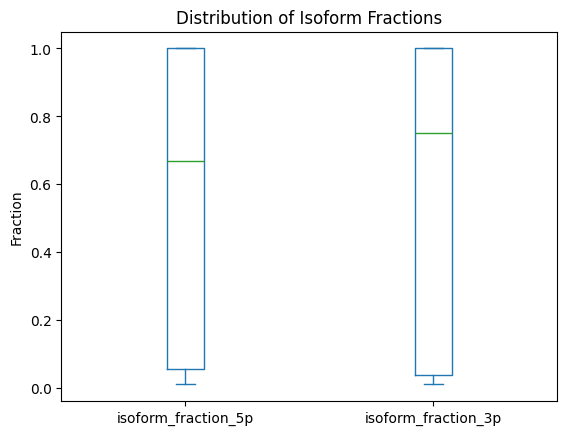

In [48]:
df['isoform_fraction_5p'] = pd.to_numeric(df['isoform_fraction_5p'], errors='coerce')
df['isoform_fraction_3p'] = pd.to_numeric(df['isoform_fraction_3p'], errors='coerce')

df[['isoform_fraction_5p', 'isoform_fraction_3p']].plot(kind='box')
plt.title('Distribution of Isoform Fractions')
plt.ylabel('Fraction')
plt.show()

In [50]:
summary_stats = df[['score', 'distance', 'total_frags', 'spanning_frags',
                    'isoform_fraction_5p', 'isoform_fraction_3p']].describe()
print(summary_stats)


0           score      distance  isoform_fraction_5p  isoform_fraction_3p
count  318.000000  1.530000e+02           318.000000           318.000000
mean     3.852201  2.810568e+05             0.557570             0.565994
std      4.765827  2.474205e+07             0.446656             0.450835
min      2.000000 -1.258990e+08             0.010363             0.010101
25%      2.000000 -3.502300e+04             0.054429             0.038776
50%      2.000000  0.000000e+00             0.666667             0.750000
75%      4.000000  1.456000e+04             1.000000             1.000000
max     56.000000  2.252042e+08             1.000000             1.000000


In [51]:
gene_pairs = df['genes5p'].astype(str) + ' - ' + df['genes3p'].astype(str)
fusion_counts = gene_pairs.value_counts().head(10)
print(fusion_counts)

NPIPL2 - LOC23117,NPIPL3     6
NPIPL2 - NPIPL3              6
SMA4 - NAIP                  4
LOC23117 - AK125313          3
LOC440295 - GOLGA8A          2
GUSBL2 - SMA3                2
LOC440295 - AK098200         2
BC108260 - KLRD1,CD94_alt    2
LOC440295 - GOLGA8B          2
LOC728989 - AX747132         2
Name: count, dtype: int64


In [52]:
numeric_cols = df[['score', 'distance', 'total_frags', 'spanning_frags',
                   'isoform_fraction_5p', 'isoform_fraction_3p']].apply(pd.to_numeric, errors='coerce')
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

0                       score  distance  total_frags  spanning_frags  \
0                                                                      
score                1.000000 -0.121833     1.000000        0.051242   
distance            -0.121833  1.000000    -0.121833       -0.038854   
total_frags          1.000000 -0.121833     1.000000        0.051242   
spanning_frags       0.051242 -0.038854     0.051242        1.000000   
isoform_fraction_5p  0.059137  0.048296     0.059137       -0.007341   
isoform_fraction_3p  0.156809 -0.059096     0.156809       -0.033629   

0                    isoform_fraction_5p  isoform_fraction_3p  
0                                                              
score                           0.059137             0.156809  
distance                        0.048296            -0.059096  
total_frags                     0.059137             0.156809  
spanning_frags                 -0.007341            -0.033629  
isoform_fraction_5p             1.00000

In [55]:
df['strand_match'] = df['strand5p'] == df['strand3p']
print(df['strand_match'].value_counts())

strand_match
True     192
False    126
Name: count, dtype: int64
